# Analyzing the Data Set Using ARIMA

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import data
df = pd.read_csv(r"D:\Prithvi\Academic_Projects\ARIMA\USA Beer production.csv", index_col ='Month', parse_dates =True)

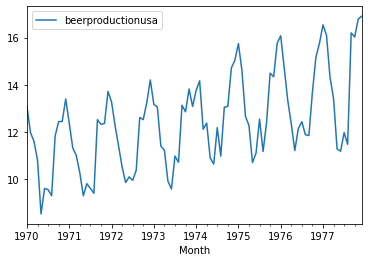

In [4]:
# Plot the time series using the DataFrame's .plot() method.
df.plot()
plt.show()

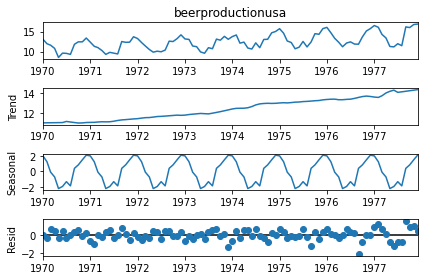

In [10]:
# Import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(df['beerproductionusa'], 
                            extrapolate_trend=12)

# Plot decomposition
decomp.plot()
plt.show()

# check for stationarity

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
# Run Dicky-Fuller test
result = adfuller(df['beerproductionusa'])

In [14]:
# Print test statistic
print(result)

(0.8181778322695059, 0.9919239975847831, 11, 84, {'1%': -3.510711795769895, '5%': -2.8966159448223734, '10%': -2.5854823866213152}, 188.41098819060602)


In [15]:
# Make it stationary Take the first difference of the data
df_diff = df.diff().dropna()


In [16]:
# Run Dicky-Fuller test
result = adfuller(df_diff['beerproductionusa'])

In [17]:
# Print test statistic
print(result)

(-9.128501525658331, 3.0670770517780064e-15, 10, 84, {'1%': -3.510711795769895, '5%': -2.8966159448223734, '10%': -2.5854823866213152}, 184.6621163547385)


In [18]:
# Import ACF and PCF functions
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

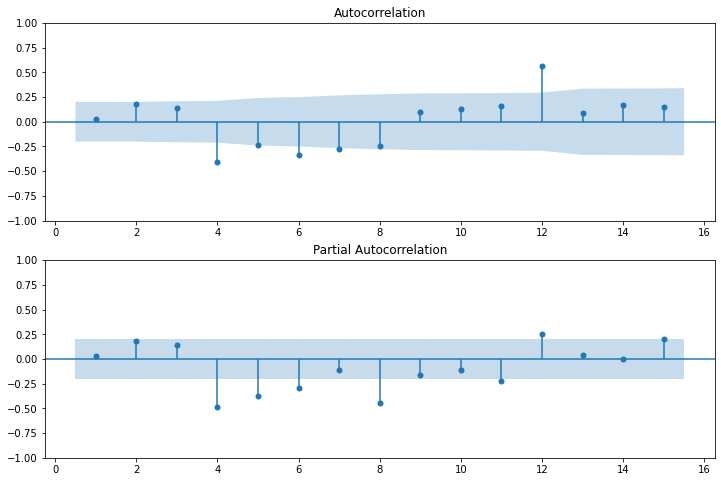

In [19]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF on ax1
plot_acf(df_diff, lags=15, zero=False, ax=ax1)

# Plot the PACF of on ax2
plot_pacf(df_diff, lags=15, zero=False, ax=ax2)

plt.show()

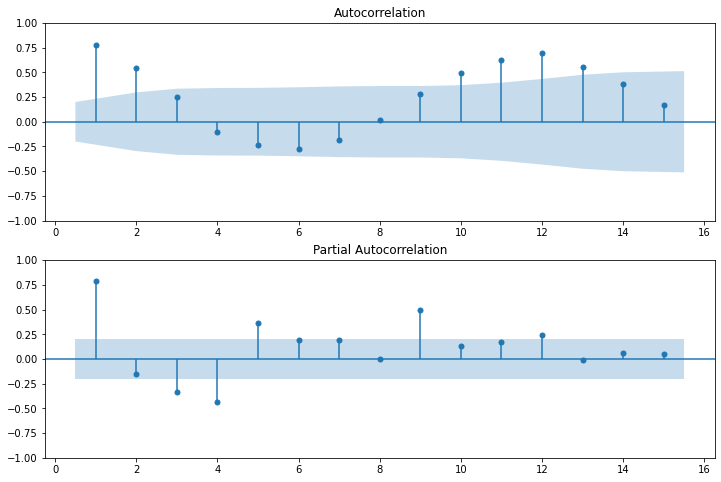

In [20]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF on ax1
plot_acf(df, lags=15, zero=False, ax=ax1)

# Plot the PACF of on ax2
plot_pacf(df, lags=15, zero=False, ax=ax2)

plt.show()

### Generate Prediction using your own values p= 2 and q=2

#### Generating One Step Ahead Predictions in sample

In [21]:
# Import the ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [22]:
model = ARIMA(df, order=(2,1,2))

C:\Users\Prithvi\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Prithvi\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Prithvi\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [23]:
results = model.fit()

# Print fit summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:      beerproductionusa   No. Observations:                   96
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -148.951
Date:                Sat, 12 Mar 2022   AIC                            307.903
Time:                        08:00:28   BIC                            320.672
Sample:                    01-01-1970   HQIC                           313.063
                         - 12-01-1977                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0199      0.272     -0.073      0.942      -0.553       0.513
ar.L2          0.5759      0.205      2.809      0.005       0.174       0.978
ma.L1         -0.0648      0.173     -0.375      0.7

In [25]:
# Generate predictions for the last 12 periods in sample
one_step_forecast = results.get_prediction(start=-12)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower beerproductionusa']
upper_limits = confidence_intervals.loc[:,'upper beerproductionusa']

# Print best estimate predictions
print(mean_forecast)

1977-01-01    15.287282
1977-02-01    15.834459
1977-03-01    15.469491
1977-04-01    13.944686
1977-05-01    13.434160
1977-06-01    11.402172
1977-07-01    11.808870
1977-08-01    12.076622
1977-09-01    11.839814
1977-10-01    16.044664
1977-11-01    15.027199
1977-12-01    16.573866
Freq: MS, Name: predicted_mean, dtype: float64


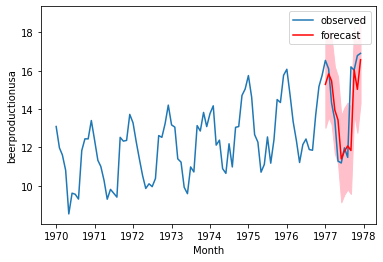

In [26]:
# plot the  data
plt.plot(df.index, df, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Month')
plt.ylabel('beerproductionusa')
plt.legend()
plt.show()

#### Generate Dynamic Predictions

In [27]:
# Generate predictions
one_step_forecast = results.get_prediction(start=-12, dynamic = True)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower beerproductionusa']
upper_limits = confidence_intervals.loc[:,'upper beerproductionusa']

# Print best estimate predictions
print(mean_forecast)

1977-01-01    15.287282
1977-02-01    14.689632
1977-03-01    14.430434
1977-04-01    14.091418
1977-05-01    13.948890
1977-06-01    13.756495
1977-07-01    13.678240
1977-08-01    13.569001
1977-09-01    13.526106
1977-10-01    13.464052
1977-11-01    13.440583
1977-12-01    13.405315
Freq: MS, Name: predicted_mean, dtype: float64


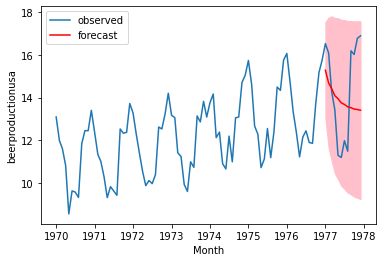

In [28]:
# plot the  data
plt.plot(df.index, df, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Month')
plt.ylabel('beerproductionusa')
plt.legend()
plt.show()

#### Out of the Sample Predictions (12 periods ahead)

In [29]:
forecast = results.get_forecast(steps =12)
mean_forecast= forecast.predicted_mean
confidence_intervals= forecast.conf_int()
confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower beerproductionusa']
upper_limits = confidence_intervals.loc[:,'upper beerproductionusa']

# Print best estimate predictions
print(mean_forecast.index.dtype)
print(mean_forecast)

datetime64[ns]
1978-01-01    15.815883
1978-02-01    15.623091
1978-03-01    15.000315
1978-04-01    14.901664
1978-05-01    14.544990
1978-06-01    14.495265
1978-07-01    14.290858
1978-08-01    14.266284
1978-09-01    14.149061
1978-10-01    14.137238
1978-11-01    14.069969
1978-12-01    14.064497
Freq: MS, Name: predicted_mean, dtype: float64


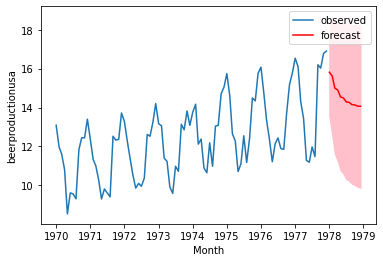

In [31]:
# plot the  data
plt.plot(df.index, df, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Month')
plt.ylabel('beerproductionusa')
plt.legend()
plt.show()

#### Use the grid search method to calculate the parameter p and q

In [32]:
# Create empty list to store search results
order_aic_bic=[]
# Loop over p values from 0-2
for p in range(3):
# Loop over q values from 0-2
    for q in range(3):
        try:
            # Create and fit ARIMA(p,d,q) model
            model = ARIMA(df, order=(p,0,q), trend='c')
            results = model.fit()
            # Append order and results tuple
            order_aic_bic.append((p,q,results.aic, results.bic))
        except:
            print(p, q, None, None)

C:\Users\Prithvi\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Prithvi\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Prithvi\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Prithvi\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Prithvi\AppData\Roaming\Pyt

In [33]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

   p  q         AIC         BIC
8  2  2  281.212184  296.598273
5  1  2  295.607985  308.429726
6  2  0  308.774671  319.032064
3  1  0  308.843223  316.536268
4  1  1  309.670542  319.927934
7  2  1  309.859711  322.681452
2  0  2  325.897497  336.154890
1  0  1  339.800949  347.493993
0  0  0  403.328558  408.457254
   p  q         AIC         BIC
8  2  2  281.212184  296.598273
5  1  2  295.607985  308.429726
3  1  0  308.843223  316.536268
6  2  0  308.774671  319.032064
4  1  1  309.670542  319.927934
7  2  1  309.859711  322.681452
2  0  2  325.897497  336.154890
1  0  1  339.800949  347.493993
0  0  0  403.328558  408.457254


# Based on the results p=2 and q=2 and d=1 

In [40]:
# Instantiate the model
arma = ARIMA(df, order=(2,2,2))

C:\Users\Prithvi\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Prithvi\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Prithvi\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [41]:
results = arma.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:      beerproductionusa   No. Observations:                   96
Model:                 ARIMA(2, 2, 2)   Log Likelihood                -154.211
Date:                Sat, 12 Mar 2022   AIC                            318.421
Time:                        08:31:51   BIC                            331.138
Sample:                    01-01-1970   HQIC                           323.558
                         - 12-01-1977                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9361      0.189     -4.945      0.000      -1.307      -0.565
ar.L2         -0.6791      0.130     -5.238      0.000      -0.933      -0.425
ma.L1          0.2780      0.204      1.364      0.1

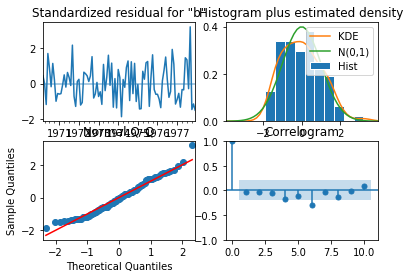

In [42]:
# Create the 4 diagostics plots
results.plot_diagnostics()
plt.show()

#### Generate one step forecast

In [43]:
# Generate predictions
one_step_forecast = results.get_prediction(start=-12)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower beerproductionusa']
upper_limits = confidence_intervals.loc[:,'upper beerproductionusa']

# Print best estimate predictions
print(mean_forecast)

1977-01-01    17.646933
1977-02-01    16.779843
1977-03-01    15.962589
1977-04-01    13.839950
1977-05-01    11.729062
1977-06-01     9.394659
1977-07-01    10.325915
1977-08-01    11.840730
1977-09-01    12.249179
1977-10-01    17.840572
1977-11-01    18.208876
1977-12-01    18.763172
Freq: MS, Name: predicted_mean, dtype: float64


In [ ]:
# plot the  data
plt.plot(df.index, df, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Month')
plt.ylabel('beerproductionusa')
plt.legend()
plt.show()

#### Generate Dynamic Predictions

In [45]:
# Generate predictions
one_step_forecast = results.get_prediction(start=-12, dynamic = True)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower beerproductionusa']
upper_limits = confidence_intervals.loc[:,'upper beerproductionusa']

# Print best estimate predictions
print(mean_forecast)

1977-01-01    17.646933
1977-02-01    18.267881
1977-03-01    19.188894
1977-04-01    20.690156
1977-05-01    21.444450
1977-06-01    22.503920
1977-07-01    23.785009
1977-08-01    24.651378
1977-09-01    25.755462
1977-10-01    26.918671
1977-11-01    27.865090
1977-12-01    28.974295
Freq: MS, Name: predicted_mean, dtype: float64


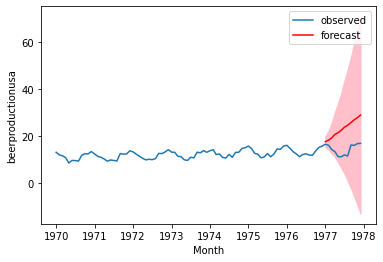

In [46]:
# plot the  data
plt.plot(df.index, df, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Month')
plt.ylabel('beerproductionusa')
plt.legend()
plt.show()

#### Out of the Sample Predictions

In [47]:
forecast = results.get_forecast(steps =12)
mean_forecast= forecast.predicted_mean
confidence_intervals= forecast.conf_int()
confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower beerproductionusa']
upper_limits = confidence_intervals.loc[:,'upper beerproductionusa']

# Print best estimate predictions
print(mean_forecast)

1978-01-01    15.817352
1978-02-01    15.436668
1978-03-01    15.212570
1978-04-01    14.362438
1978-05-01    13.992002
1978-06-01    13.597682
1978-07-01    12.899937
1978-08-01    12.502455
1978-09-01    12.029961
1978-10-01    11.423765
1978-11-01    10.993673
1978-12-01    10.489531
Freq: MS, Name: predicted_mean, dtype: float64


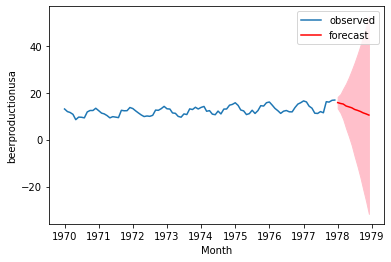

In [48]:
# plot the  data
plt.plot(df.index, df, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Month')
plt.ylabel('beerproductionusa')
plt.legend()
plt.show()